# Comparison across base editors

The purpose of this notebook is to compare the performance of guides targeting BRCA1 when screened with each of the variant base editors (WTCas9/Cas9-NG/SpG ABE8e or CBE3.9max). 

This notebook will use z-scored LFC values for each guide to generate correlation scatterplots of WTCas9 v. Cas9-NG and WTCas9 v. SpG for both ABE and CBE (Figures 5c and 5d).

This notebook will also generate a scatterplot of Cas9-NG ABE v. Cas9-NG CBE z-scored LFC values for each guide in the primary screen, with all guides chosen for validation labelled (Supplementary Figure 6g).

Input files for this notebook should be generated using the BCL2_counts_processing.ipynb notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import gpplot as gpp
from matplotlib import rc

# Set default settings for plotting
sns.set(style='ticks',context='paper')
mpl.rc('pdf', fonttype=42)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [2]:
#2021-05-07 AKS updated with newly filtered data
brca1_ng_cbe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-NG-CBE_LFC.csv')


In [3]:
print(brca1_ng_cbe.shape)
brca1_ng_cbe.head()

(11641, 43)


,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,HAP1_Dropout_RepC,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,...,Nucleotide edits,Amino acid edits,Mutation category,Clinical significance,BsmBI flag,4T flag,AvgHAP1_Meljuso;z-score,Mutation bin,Residues,Median Residues
0,CTGTTCCAATGAACTTTAAC,BRCA1,-0.778097,-1.102872,-1.243311,-0.832843,-0.715490,-0.799696,-0.935742,-0.787923,...,C_6;C_7;,utr;utr;,UTR;UTR;,None;Uncertain significance,NaN,NaN,-9.051298,UTR,utr;utr;,NaN
1,ATGTGTTAAAGTTCATTGGA,BRCA1,-0.060195,0.126319,0.332845,0.154970,0.123453,0.031662,0.157643,0.094979,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.797852,No edits,NaN,NaN
2,TCTGTTCCAATGAACTTTAA,BRCA1,-0.579206,-0.268600,-0.355417,-0.428716,-0.097972,-0.470759,-0.365912,-0.347365,...,C_7;C_8;,utr;utr;,UTR;UTR;,Uncertain significance;None,NaN,NaN,-4.721485,UTR,utr;utr;,NaN
3,TGTGTTAAAGTTCATTGGAA,BRCA1,0.316748,0.022198,0.363735,0.051371,-0.022138,-0.022786,0.055790,-0.048526,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.027600,No edits,NaN,NaN
4,TTCTGTTCCAATGAACTTTA,BRCA1,-0.408376,-0.247209,-0.473564,-0.209041,-0.295195,-0.205968,-0.399921,-0.364444,...,C_8;,utr;,UTR;,None,NaN,NaN,-4.515973,UTR,utr;,NaN


In [4]:
brca_wt_cbe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-WT-CBE_LFC.csv')

# Compare CBEs

In [5]:
print(brca_wt_cbe.shape)
brca_wt_cbe.head()

(723, 38)


,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,HAP1_Dropout_RepC,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,...,# silent edits,Nucleotide edits,Amino acid edits,Mutation category,Clinical significance,Match Bin I counts,AvgHAP1_Meljuso;z-score,Mutation bin,Residues,Median Residues
0,TTCATTGGAACAGAAAGAAA,TTCATTGGAACAGAAAGAAA;BRCA1;,-0.950986,-0.884010,-0.818571,-0.885524,-0.848881,-0.856270,-0.962905,-0.881408,...,0.0,NaN,NaN,NaN,NaN,1,-3.287739,No edits,NaN,NaN
1,AAATCTTAGAGTGTCCCATC,AAATCTTAGAGTGTCCCATC;BRCA1;I21I;,0.348789,0.287101,0.185596,0.336294,0.207309,0.109502,0.250728,0.104310,...,1.0,C_5;,Ile21Ile;,Silent;,Likely benign,0,0.178913,Silent,21;,21.0
2,CTTGTGCTGACTTACCAGAT,CTTGTGCTGACTTACCAGAT;BRCA1;Exon2:+9;,0.190411,0.140385,0.296765,-0.703793,-0.265804,-0.677387,0.094742,0.028039,...,0.0,NaN,NaN,NaN,NaN,0,-0.158507,No edits,NaN,NaN
3,TCTTGTGCTGACTTACCAGA,TCTTGTGCTGACTTACCAGA;BRCA1;Exon2:+9;,-0.196196,-0.306559,-0.227523,-2.333888,-2.474497,-1.926979,-0.660860,-0.628593,...,0.0,NaN,NaN,NaN,NaN,0,-1.806541,No edits,NaN,NaN
4,AGCACAAGAGTGTATTAATT,AGCACAAGAGTGTATTAATT;BRCA1;Exon2:+12;,0.540360,0.505754,0.521858,0.397165,0.281295,0.384297,0.338703,0.348768,...,0.0,C_5;,Exon2:+12;,Intron;,None,1,0.759998,Intron,intron;,NaN


In [6]:
#rename columns such that we can tell them apart
brca1_ng_cbe = brca1_ng_cbe.rename(columns={'AvgHAP1_Meljuso;z-score': 'AvgHAP1_Meljuso;z-score;NG-CBE'})

brca_wt_cbe = brca_wt_cbe.rename(columns={'AvgHAP1_Meljuso;z-score': 'AvgHAP1_Meljuso;z-score;WT-CBE'})

In [7]:
#merge on shared sgRNAs between wt and ng

wt_ng_cbe = pd.merge(brca1_ng_cbe, brca_wt_cbe, on= ['Construct Barcode'], how='inner')

In [8]:
wt_ng_cbe = wt_ng_cbe[['Construct Barcode', 'Construct IDs_x', 'AvgHAP1_Meljuso;z-score;NG-CBE',
                    'AvgHAP1_Meljuso;z-score;WT-CBE', 'PAM_x', 'Edit_x', 'Amino acid edits_x', 
                    'Mutation bin_x', 'Clinical significance_x']]

In [9]:
print(wt_ng_cbe.shape)
wt_ng_cbe.head()

(547, 9)


,Construct Barcode,Construct IDs_x,AvgHAP1_Meljuso;z-score;NG-CBE,AvgHAP1_Meljuso;z-score;WT-CBE,PAM_x,Edit_x,Amino acid edits_x,Mutation bin_x,Clinical significance_x
0,AAATCTTAGAGTGTCCCATC,BRCA1,-1.365564,0.178913,TGGT,C-T,Ile21Ile;,Silent,Likely benign
1,CTTGTGCTGACTTACCAGAT,BRCA1,-0.870621,-0.158507,GGGA,C-T,Exon2:+9;,Intron,None
2,TCTTGTGCTGACTTACCAGA,BRCA1,-3.666501,-1.806541,TGGG,C-T,Exon2:+9;,Intron,None
3,AGCACAAGAGTGTATTAATT,BRCA1,0.131991,0.759998,TGGG,C-T,Exon2:+12;,Intron,None
4,CCAGACTAGCAGGGTAGGGG,BRCA1,-6.463929,-8.200470,GGGA,C-T,Exon3:-1;,Splice site,Pathogenic/Likely pathogenic


In [10]:
#plot only sgRNAs targeting BRCA1
wt_ng_cbe = wt_ng_cbe[wt_ng_cbe['Construct IDs_x'] == 'BRCA1']

In [11]:
len(wt_ng_cbe)

525

In [12]:
#drop noncoding guides
wt_ng_cbe_coding = wt_ng_cbe[wt_ng_cbe['Mutation bin_x']!='Intron']
wt_ng_cbe_coding = wt_ng_cbe_coding[wt_ng_cbe_coding['Mutation bin_x']!= 'UTR']

In [13]:
len(wt_ng_cbe_coding)

459

In [14]:
color_dictionary = dict({'No edits':'#8da0cb',
                  'Silent': '#8da0cb',
                  'Missense': '#e78ac3',
                  'Splice site': '#a6d854',
                  'Nonsense': '#ffd92f'})


(-13.0, 5.0)

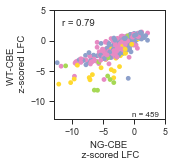

In [15]:
sns.set(rc={'figure.figsize':(2,2)})
gpp.set_aesthetics(context='paper', palette='Set2')
ax= sns.scatterplot(x='AvgHAP1_Meljuso;z-score;NG-CBE', y='AvgHAP1_Meljuso;z-score;WT-CBE',
               data = wt_ng_cbe_coding, hue='Mutation bin_x', palette=color_dictionary,linewidth=0, legend=False)
gpp.add_correlation(x='AvgHAP1_Meljuso;z-score;NG-CBE', y='AvgHAP1_Meljuso;z-score;WT-CBE',
               data = wt_ng_cbe_coding)

ax.set_xticks([-15,-10,-5,0,5])
ax.set_yticks([-15,-10,-5,0,5])
ax.text(4,-12.75,'n = '+str(len(wt_ng_cbe_coding)), fontsize=8,ha='right',va='bottom')


plt.xlabel('NG-CBE \n z-scored LFC')
plt.ylabel ('WT-CBE \n z-scored LFC')
# plt.axhline(-2, linestyle='dashed', color = 'grey')
# plt.axhline(-4, linestyle='dashed', color = 'grey')
# plt.axvline(-2, linestyle='dashed', color = 'grey')
# plt.axvline(-4, linestyle='dashed', color = 'grey')
plt.xlim(-13,5)
plt.ylim(-13,5)
#ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('../../Figures/panels/Fig 5/ng cbe vs wt_v4.pdf', bbox_inches='tight', dpi=1000, transparent=True)


In [16]:
wt_ng_cbe['Construct IDs_x'].value_counts()

BRCA1    525
Name: Construct IDs_x, dtype: int64

In [17]:
wt_ng_cbe['Mutation bin_x'].value_counts()

Missense       199
No edits       144
Silent          79
Intron          59
Nonsense        26
Splice site     11
UTR              7
Name: Mutation bin_x, dtype: int64

### SpG vs WT -- CBE

In [18]:
print(brca_wt_cbe.shape)
brca_wt_cbe.head()

(723, 38)


,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,HAP1_Dropout_RepC,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,...,# silent edits,Nucleotide edits,Amino acid edits,Mutation category,Clinical significance,Match Bin I counts,AvgHAP1_Meljuso;z-score;WT-CBE,Mutation bin,Residues,Median Residues
0,TTCATTGGAACAGAAAGAAA,TTCATTGGAACAGAAAGAAA;BRCA1;,-0.950986,-0.884010,-0.818571,-0.885524,-0.848881,-0.856270,-0.962905,-0.881408,...,0.0,NaN,NaN,NaN,NaN,1,-3.287739,No edits,NaN,NaN
1,AAATCTTAGAGTGTCCCATC,AAATCTTAGAGTGTCCCATC;BRCA1;I21I;,0.348789,0.287101,0.185596,0.336294,0.207309,0.109502,0.250728,0.104310,...,1.0,C_5;,Ile21Ile;,Silent;,Likely benign,0,0.178913,Silent,21;,21.0
2,CTTGTGCTGACTTACCAGAT,CTTGTGCTGACTTACCAGAT;BRCA1;Exon2:+9;,0.190411,0.140385,0.296765,-0.703793,-0.265804,-0.677387,0.094742,0.028039,...,0.0,NaN,NaN,NaN,NaN,0,-0.158507,No edits,NaN,NaN
3,TCTTGTGCTGACTTACCAGA,TCTTGTGCTGACTTACCAGA;BRCA1;Exon2:+9;,-0.196196,-0.306559,-0.227523,-2.333888,-2.474497,-1.926979,-0.660860,-0.628593,...,0.0,NaN,NaN,NaN,NaN,0,-1.806541,No edits,NaN,NaN
4,AGCACAAGAGTGTATTAATT,AGCACAAGAGTGTATTAATT;BRCA1;Exon2:+12;,0.540360,0.505754,0.521858,0.397165,0.281295,0.384297,0.338703,0.348768,...,0.0,C_5;,Exon2:+12;,Intron;,None,1,0.759998,Intron,intron;,NaN


In [19]:
spg_cbe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-SpG-CBE_LFC_v2.csv')

In [20]:
print(spg_cbe.shape)
spg_cbe.head()

(11635, 40)


,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,HAP1_Dropout_RepAB,Meljuso_Dropout_RepAB,...,Nucleotide edits,Amino acid edits,Mutation category,Clinical significance,BsmBI flag,4T flag,AvgHAP1_Meljuso;z-score,Mutation bin,Residues,Median Residues
0,CTGTTCCAATGAACTTTAAC,BRCA1,-0.678967,-0.307261,-0.715497,-0.876816,-0.574603,-0.920235,-0.493114,-0.796157,...,C_6;C_7;,utr;utr;,UTR;UTR;,None;Uncertain significance,NaN,NaN,-6.571863,UTR,utr;utr;,NaN
1,ATGTGTTAAAGTTCATTGGA,BRCA1,-0.127355,0.166564,-0.000371,0.094519,0.267944,0.059226,0.019604,0.047074,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.023451,No edits,NaN,NaN
2,TCTGTTCCAATGAACTTTAA,BRCA1,-0.463288,-0.675417,-0.431660,-0.397524,-0.423830,-0.635142,-0.569352,-0.414592,...,C_7;C_8;,utr;utr;,UTR;UTR;,Uncertain significance;None,NaN,NaN,-6.019663,UTR,utr;utr;,NaN
3,TGTGTTAAAGTTCATTGGAA,BRCA1,0.038987,0.021819,0.150096,0.159416,0.111368,0.119225,0.030403,0.154756,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.169553,No edits,NaN,NaN
4,TTCTGTTCCAATGAACTTTA,BRCA1,-0.325489,-0.304338,-0.369750,-0.470117,-0.437012,-0.426546,-0.314914,-0.419934,...,C_8;,utr;,UTR;,None,NaN,NaN,-4.647310,UTR,utr;,NaN


In [21]:
#rename spg

spg_cbe = spg_cbe.rename(columns={'AvgHAP1_Meljuso;z-score': 'AvgHAP1_Meljuso;z-score;SpG-CBE'})

In [22]:
#merge on shared guides targeting BRCA1

wt_spg_cbe = pd.merge(brca_wt_cbe, spg_cbe, on = 'Construct Barcode',how = 'inner')


In [23]:
wt_spg_cbe = wt_spg_cbe[wt_spg_cbe['Construct IDs_y'] == 'BRCA1']

In [24]:
wt_spg_cbe_coding = wt_spg_cbe[wt_spg_cbe['Mutation bin_y']!='Intron']
wt_spg_cbe_coding = wt_spg_cbe_coding[wt_spg_cbe_coding['Mutation bin_y']!= 'UTR']

In [25]:
print(wt_spg_cbe_coding.shape)
wt_spg_cbe_coding.head()

(459, 77)


,Construct Barcode,Construct IDs_x,HAP1_Dropout_RepA_x,HAP1_Dropout_RepB_x,HAP1_Dropout_RepC,Meljuso_Dropout_RepA_x,Meljuso_Dropout_RepB_x,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA_x,Meljuso_Cisplatin_RepB_x,...,Nucleotide edits_y,Amino acid edits_y,Mutation category_y,Clinical significance_y,BsmBI flag,4T flag,AvgHAP1_Meljuso;z-score;SpG-CBE,Mutation bin_y,Residues_y,Median Residues_y
0,AAATCTTAGAGTGTCCCATC,AAATCTTAGAGTGTCCCATC;BRCA1;I21I;,0.348789,0.287101,0.185596,0.336294,0.207309,0.109502,0.250728,0.104310,...,C_5;,Ile21Ile;,Silent;,Likely benign,NaN,NaN,-0.991746,Silent,21;,21.0
4,CCAGACTAGCAGGGTAGGGG,CCAGACTAGCAGGGTAGGGG;BRCA1;Exon3:-1;,-3.123345,-3.216919,-3.610941,-1.284515,-1.651670,-1.468709,-2.018091,-1.570603,...,C_6;,Exon3:-1;,Splice-acceptor;,Pathogenic/Likely pathogenic,NaN,NaN,-6.899247,Splice site,intron;,NaN
5,TCCAGACTAGCAGGGTAGGG,TCCAGACTAGCAGGGTAGGG;BRCA1;Exon3:-1;,-2.412283,-2.342102,-2.253729,-0.973591,-1.258844,-1.231295,-1.381554,-1.110568,...,C_7;,Exon3:-1;,Splice-acceptor;,Pathogenic/Likely pathogenic,NaN,NaN,-6.005795,Splice site,intron;,NaN
6,CTCCAGACTAGCAGGGTAGG,CTCCAGACTAGCAGGGTAGG;BRCA1;L28L;Exon3:-1;,-0.696691,-0.529950,-0.622318,0.314960,0.220615,0.320277,-0.677398,-0.306429,...,C_4;C_8;,Leu28Leu;Exon3:-1;,Silent;Splice-acceptor;,Pathogenic/Likely pathogenic;Uncertain signifi...,NaN,NaN,-2.224105,Splice site,28;intron;,NaN
7,ACTCCAGACTAGCAGGGTAG,ACTCCAGACTAGCAGGGTAG;BRCA1;E29K;L28L;,-0.195325,-0.049541,-0.016768,0.391230,0.336281,0.160227,-0.614949,-0.633144,...,C_4;C_5;,Glu29Lys;Leu28Leu;,Missense;Silent;,None;Uncertain significance,NaN,NaN,-0.610708,Missense,29;28;,28.5


(-13.0, 5.0)

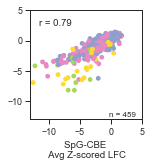

In [26]:
gpp.set_aesthetics(context='paper')
ax= sns.scatterplot(x='AvgHAP1_Meljuso;z-score;SpG-CBE', y='AvgHAP1_Meljuso;z-score;WT-CBE',
               data = wt_spg_cbe_coding, hue='Mutation bin_y', palette= color_dictionary, linewidth=0, legend=False)

gpp.add_correlation(x='AvgHAP1_Meljuso;z-score;SpG-CBE', y='AvgHAP1_Meljuso;z-score;WT-CBE',
               data = wt_spg_cbe_coding)
sns.set(rc={'figure.figsize':(2,2)})
plt.xlabel('SpG-CBE \n Avg Z-scored LFC')
plt.ylabel ('')

ax.set_xticks([-15,-10,-5,0,5])
ax.set_yticks([-15,-10,-5,0,5])

ax.text(4,-12.75,'n = '+str(len(wt_spg_cbe_coding)), fontsize=8,ha='right',va='bottom')


plt.xlim(-13,5)
plt.ylim(-13,5)
#ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('../../Figures/panels/Fig 5/spg cbe vs wt_v2.pdf', bbox_inches='tight', dpi=1000, transparent=True)


# ABEs

WT vs. NG

In [27]:
wt_abe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-WT-ABE8e_LFC.csv')

In [28]:
print(wt_abe.shape)
wt_abe.head()

(723, 44)


,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,HAP1_Dropout_RepC,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,...,Amino acid edits,Mutation category,Clinical significance,BsmBI flag,4T flag,Match Bin I counts,AvgHAP1_Meljuso;z-score,Mutation bin,Residues,Median Residues
0,TTCATTGGAACAGAAAGAAA,BRCA1,-2.175275,-1.763892,-1.982709,-1.376859,-1.814091,-1.210669,-1.797236,-1.669758,...,utr;,UTR;,Conflicting interpretations of pathogenicity,NaN,NaN,1,-3.106649,UTR,utr;,NaN
1,AAATCTTAGAGTGTCCCATC,BRCA1,0.127530,0.415294,0.438687,0.352026,0.189607,0.522885,0.366971,0.488086,...,Leu22Leu;,Silent;,Likely benign,NaN,NaN,0,0.751902,Silent,22;,22.0
2,CTTGTGCTGACTTACCAGAT,BRCA1,0.589022,0.028098,0.526519,0.630486,0.833777,0.630715,0.004752,-0.171441,...,NaN,NaN,NaN,NaN,NaN,0,0.307540,No edits,NaN,NaN
3,TCTTGTGCTGACTTACCAGA,BRCA1,-1.526309,-1.474756,-1.230448,-0.995462,-0.929363,-1.403055,-1.603283,-0.840253,...,NaN,NaN,NaN,NaN,NaN,0,-2.426034,No edits,NaN,NaN
4,AGCACAAGAGTGTATTAATT,BRCA1,-0.307220,-0.647536,-0.370546,-0.265478,-0.591909,-0.698018,-0.514317,-0.655819,...,Exon2:+11;Exon2:+13;Exon2:+14;,Intron;Intron;Intron;,Likely benign;None;None,NaN,NaN,1,-0.897320,Intron,intron;intron;intron;,NaN


In [29]:
ng_abe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-NG-ABE8e_LFC.csv')

In [30]:
#change column names for merge
wt_abe = wt_abe.rename(columns={'AvgHAP1_Meljuso;z-score' : 'AvgHAP1_Meljuso;z-score;WT-ABE'})
ng_abe = ng_abe.rename(columns={'AvgHAP1_Meljuso;z-score' : 'AvgHAP1_Meljuso;z-score;NG-ABE'})

In [31]:
#merge on shared sgRNAs between wt and ng

both_abe = pd.merge(ng_abe, wt_abe, on= 'Construct Barcode', how='inner')

In [32]:
gpp.set_aesthetics(context='paper', palette='Set2')

In [33]:
both_abe_noctrl = both_abe[both_abe['Construct IDs_x'] == 'BRCA1']

In [34]:
print(both_abe_noctrl.shape)

(525, 83)


In [35]:
#drop noncoding sgRNAs

both_abe_noctrl_coding = both_abe_noctrl[both_abe_noctrl['Mutation bin_x'] != 'UTR']
both_abe_noctrl_coding = both_abe_noctrl_coding[both_abe_noctrl_coding['Mutation bin_x'] != 'Intron']

In [36]:
# #color_dictionary = dict({'No edits':'#8da0cb',
#                   'Silent': '#8da0cb',
#                   'Missense': '#e78ac3',
#                   'Splice site': '#ffd92f',
#                   'Nonsense': '#a6d854'})

(-13.0, 5.0)

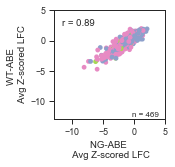

In [37]:
gpp.set_aesthetics(context='paper')
ax= sns.scatterplot(x='AvgHAP1_Meljuso;z-score;NG-ABE', y='AvgHAP1_Meljuso;z-score;WT-ABE',
               data = both_abe_noctrl_coding, hue='Mutation bin_x', palette= color_dictionary, linewidth=0, legend=False)

gpp.add_correlation(x='AvgHAP1_Meljuso;z-score;NG-ABE', y='AvgHAP1_Meljuso;z-score;WT-ABE',
               data = both_abe_noctrl_coding)
sns.set(rc={'figure.figsize':(2,2)})
plt.xlabel('NG-ABE \n Avg Z-scored LFC')
plt.ylabel ('WT-ABE \n Avg Z-scored LFC')

ax.text(4,-12.75,'n = '+str(len(both_abe_noctrl_coding)), fontsize=8,ha='right',va='bottom')
ax.set_xticks([-15,-10,-5,0,5])
ax.set_yticks([-15,-10,-5,0,5])

plt.xlim(-13,5)
plt.ylim(-13,5)
#ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('../../Figures/panels/Fig 5/ng abe vs wt_v2.pdf', bbox_inches='tight', dpi=1000, transparent=True)


In [38]:
len(both_abe_noctrl)

525

Calculate shared hits with NG-ABE vs WT-ABE

### WT ABE vs SpG ABE  

In [39]:
spg_abe = pd.read_csv('../../data_v3/Fig 5_6_BRCA1/processed/BRCA1-SpG-ABE8e_LFC_v2.csv')

In [40]:
spg_abe = spg_abe.rename(columns={'AvgHAP1_Meljuso;z-score' : 'AvgHAP1_Meljuso;z-score;SpG-ABE'})

In [41]:
wt_abe.head()

,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,HAP1_Dropout_RepC,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,...,Amino acid edits,Mutation category,Clinical significance,BsmBI flag,4T flag,Match Bin I counts,AvgHAP1_Meljuso;z-score;WT-ABE,Mutation bin,Residues,Median Residues
0,TTCATTGGAACAGAAAGAAA,BRCA1,-2.175275,-1.763892,-1.982709,-1.376859,-1.814091,-1.210669,-1.797236,-1.669758,...,utr;,UTR;,Conflicting interpretations of pathogenicity,NaN,NaN,1,-3.106649,UTR,utr;,NaN
1,AAATCTTAGAGTGTCCCATC,BRCA1,0.127530,0.415294,0.438687,0.352026,0.189607,0.522885,0.366971,0.488086,...,Leu22Leu;,Silent;,Likely benign,NaN,NaN,0,0.751902,Silent,22;,22.0
2,CTTGTGCTGACTTACCAGAT,BRCA1,0.589022,0.028098,0.526519,0.630486,0.833777,0.630715,0.004752,-0.171441,...,NaN,NaN,NaN,NaN,NaN,0,0.307540,No edits,NaN,NaN
3,TCTTGTGCTGACTTACCAGA,BRCA1,-1.526309,-1.474756,-1.230448,-0.995462,-0.929363,-1.403055,-1.603283,-0.840253,...,NaN,NaN,NaN,NaN,NaN,0,-2.426034,No edits,NaN,NaN
4,AGCACAAGAGTGTATTAATT,BRCA1,-0.307220,-0.647536,-0.370546,-0.265478,-0.591909,-0.698018,-0.514317,-0.655819,...,Exon2:+11;Exon2:+13;Exon2:+14;,Intron;Intron;Intron;,Likely benign;None;None,NaN,NaN,1,-0.897320,Intron,intron;intron;intron;,NaN


In [42]:
#merge on shared sgRNAs between wt and ng

both_abe_spg = pd.merge(spg_abe, wt_abe, on= 'Construct Barcode', how='inner')

In [43]:
#only look at guides targeting BRCA1
both_abe_spg_brca1 = both_abe_spg[both_abe_spg['Construct IDs_x'] == 'BRCA1']
print(both_abe_spg_brca1.shape)

(529, 83)


In [44]:
#drop noncoding sgRNAs

both_abe_spg_brca1_coding = both_abe_spg_brca1[both_abe_spg_brca1['Mutation bin_x'] != 'UTR']
both_abe_spg_brca1_coding = both_abe_spg_brca1_coding[both_abe_spg_brca1_coding['Mutation bin_x'] != 'Intron']

(-13.0, 5.0)

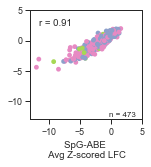

In [45]:
gpp.set_aesthetics(context='paper')
ax= sns.scatterplot(x='AvgHAP1_Meljuso;z-score;SpG-ABE', y='AvgHAP1_Meljuso;z-score;WT-ABE',
               data = both_abe_spg_brca1_coding, hue='Mutation bin_x', palette= color_dictionary, linewidth=0, legend=False)

gpp.add_correlation(x='AvgHAP1_Meljuso;z-score;SpG-ABE', y='AvgHAP1_Meljuso;z-score;WT-ABE',
               data = both_abe_spg_brca1_coding)
sns.set(rc={'figure.figsize':(2,2)})
plt.xlabel('SpG-ABE \n Avg Z-scored LFC')
plt.ylabel ('')

ax.text(4,-12.75,'n = '+str(len(both_abe_spg_brca1_coding)), fontsize=8,ha='right',va='bottom')
ax.set_xticks([-15,-10,-5,0,5])
ax.set_yticks([-15,-10,-5,0,5])

plt.xlim(-13,5)
plt.ylim(-13,5)
#ax.legend(facecolor='white', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('../../Figures/panels/Fig 5/spg abe vs wt_v2.pdf', bbox_inches='tight', dpi=1000, transparent=True)


# NG CBE vs ABE

In [46]:
ng_abe.head()

,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,HAP1_Dropout_RepAB,Meljuso_Dropout_RepAB,...,Nucleotide edits,Amino acid edits,Mutation category,Clinical significance,BsmBI flag,4T flag,AvgHAP1_Meljuso;z-score;NG-ABE,Mutation bin,Residues,Median Residues
0,CTGTTCCAATGAACTTTAAC,BRCA1,-0.315877,-2.192888,-1.148451,-0.892693,-1.651345,-0.922185,-1.254383,-1.020572,...,A_8;,utr;,UTR;,Uncertain significance,NaN,NaN,-4.703155,UTR,utr;,NaN
1,ATGTGTTAAAGTTCATTGGA,BRCA1,0.356418,0.329725,0.319577,0.681756,0.430183,0.521918,0.343072,0.500667,...,A_8;,Exon2:-23;,Intron;,None,NaN,NaN,0.029920,Intron,intron;,NaN
2,TCTGTTCCAATGAACTTTAA,BRCA1,-0.994517,-0.327970,-0.269479,-0.792946,-0.979590,-0.607706,-0.661243,-0.531212,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.173119,No edits,NaN,NaN
3,TGTGTTAAAGTTCATTGGAA,BRCA1,-0.119882,-0.132349,-0.359733,-0.124764,-0.054230,-0.155708,-0.126115,-0.242248,...,A_7;A_8;,Exon2:-23;Exon2:-22;,Intron;Intron;,None;Conflicting interpretations of pathogenicity,NaN,NaN,-1.449339,Intron,intron;intron;,NaN
4,TTCTGTTCCAATGAACTTTA,BRCA1,-0.050652,-0.560736,-0.918586,-0.438380,-0.734778,-0.609723,-0.305694,-0.678483,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.501322,No edits,NaN,NaN


In [47]:
brca1_ng_cbe.head()

,Construct Barcode,Construct IDs,HAP1_Dropout_RepA,HAP1_Dropout_RepB,HAP1_Dropout_RepC,Meljuso_Dropout_RepA,Meljuso_Dropout_RepB,Meljuso_Dropout_RepC,Meljuso_Cisplatin_RepA,Meljuso_Cisplatin_RepB,...,Nucleotide edits,Amino acid edits,Mutation category,Clinical significance,BsmBI flag,4T flag,AvgHAP1_Meljuso;z-score;NG-CBE,Mutation bin,Residues,Median Residues
0,CTGTTCCAATGAACTTTAAC,BRCA1,-0.778097,-1.102872,-1.243311,-0.832843,-0.715490,-0.799696,-0.935742,-0.787923,...,C_6;C_7;,utr;utr;,UTR;UTR;,None;Uncertain significance,NaN,NaN,-9.051298,UTR,utr;utr;,NaN
1,ATGTGTTAAAGTTCATTGGA,BRCA1,-0.060195,0.126319,0.332845,0.154970,0.123453,0.031662,0.157643,0.094979,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.797852,No edits,NaN,NaN
2,TCTGTTCCAATGAACTTTAA,BRCA1,-0.579206,-0.268600,-0.355417,-0.428716,-0.097972,-0.470759,-0.365912,-0.347365,...,C_7;C_8;,utr;utr;,UTR;UTR;,Uncertain significance;None,NaN,NaN,-4.721485,UTR,utr;utr;,NaN
3,TGTGTTAAAGTTCATTGGAA,BRCA1,0.316748,0.022198,0.363735,0.051371,-0.022138,-0.022786,0.055790,-0.048526,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.027600,No edits,NaN,NaN
4,TTCTGTTCCAATGAACTTTA,BRCA1,-0.408376,-0.247209,-0.473564,-0.209041,-0.295195,-0.205968,-0.399921,-0.364444,...,C_8;,utr;,UTR;,None,NaN,NaN,-4.515973,UTR,utr;,NaN


In [48]:
ng_abe = ng_abe.rename(columns={'Mutation bin' : 'ABE Mutation Bin',
                       'Median Residues' : 'ABE Median Residues'})

brca1_ng_cbe = brca1_ng_cbe.rename(columns={'Mutation bin' : 'CBE Mutation Bin',
                       'Median Residues' : 'CBE Median Residues'})



In [49]:
#merge NG ABE and CBE data

shared_ng = pd.merge(ng_abe, brca1_ng_cbe, on='Construct Barcode', how='inner')

In [50]:
pamlist4 = pd.read_csv('../../data_v3/pam_lists/2021-05-11_PAM list 4_v2.csv')

In [51]:
shared_ng_filt = pd.merge(pamlist4, shared_ng, left_on='PAM', right_on='PAM_x',how='inner')

In [52]:
shared_ng_filt_copy = shared_ng_filt.copy()

In [53]:
shared_ng_filt_copy['CBE/ABE Mutation Bin'] = shared_ng_filt_copy['CBE Mutation Bin'].astype(str) + "/" + shared_ng_filt_copy['ABE Mutation Bin'].astype(str)

In [54]:
#No edits and Silent mutations get grouped into "No change"
shared_ng_filt_copy['CBE/ABE Mutation Bin'] = shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.replace('No edits','No change')
shared_ng_filt_copy['CBE/ABE Mutation Bin'] = shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.replace('Silent','No change')


In [55]:
shared_ng_filt_copy['CBE/ABE Mutation Bin'].value_counts()

No change/Missense         708
Missense/Missense          530
Missense/No change         456
No change/No change        222
Intron/Intron              126
Nonsense/Missense          102
No change/Intron            79
Intron/No change            52
Splice site/Intron          16
Intron/Splice site          13
Splice site/Splice site     13
UTR/UTR                     12
Splice site/Missense        12
Splice site/No change       11
Nonsense/No change          10
No change/Splice site        7
UTR/No change                6
Nonsense/Splice site         3
UTR/Missense                 3
No change/UTR                3
Missense/Splice site         1
Name: CBE/ABE Mutation Bin, dtype: int64

In [56]:
#filter out other mutation bins
shared_ng_filt_copy = shared_ng_filt_copy[shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.contains("Intron") == False]
shared_ng_filt_copy = shared_ng_filt_copy[shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.contains("UTR") == False]
shared_ng_filt_copy = shared_ng_filt_copy[shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.contains("Nonsense") == False]
shared_ng_filt_copy = shared_ng_filt_copy[shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.contains("Splice site") == False]
shared_ng_filt_copy = shared_ng_filt_copy[shared_ng_filt_copy['CBE/ABE Mutation Bin'].str.contains("Missense") == True]


In [57]:
len(shared_ng_filt_copy)

1694

In [58]:
#shared_spg_copy.to_csv('shared_spg.csv')

In [65]:
validation = {#'GTCACCCCTAAAGAGATCAT' : 'sg1',
    'AGGAACCTGTCTCCACAAAG':  'sg2',
    'ATTCCTAGAAAATATTTCAG' : 'sg9',
    'GAAACCACCAAGGTCCAAAG' : 'sg10',
    'GAACATCTTCAGTATCTCTA' : 'sg11',
    'TATTTCACCATCATCTAACA' : 'sg12',
    #'GCTAACTTCCAGTAACGAGA' : 'sg13',
    #'TATATCATTCTTACATAAAG' : 'sg14',
    'TTACATAAAGGACACTGTGA' : 'sg15',
    #'TATCCACAATTCAAAAGCAC' : 'sg16',
    #'TAACCACTCAGGTAAAAAGC' : 'sg17',
    #'TCATCAACCCAGTAATAATG' : 'sg18',
    #'TTCTACCAGTAAAAATAAAG' : 'sg19'
    
}

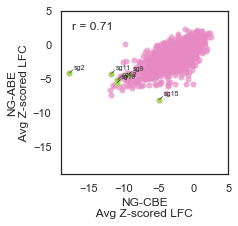

In [70]:
ax= sns.scatterplot(x='AvgHAP1_Meljuso;z-score;NG-CBE', y='AvgHAP1_Meljuso;z-score;NG-ABE',
               data = shared_ng_filt_copy, color = "#e78ac3", linewidth=0, alpha=0.7)

gpp.add_correlation(x='AvgHAP1_Meljuso;z-score;NG-CBE', y='AvgHAP1_Meljuso;z-score;NG-ABE',
               data = shared_ng_filt_copy)
sns.set(rc={'figure.figsize':(1.7,1.7)})
sns.set_style("white")
plt.xlabel('NG-CBE\n Avg Z-scored LFC ')
plt.ylabel ('NG-ABE\n Avg Z-scored LFC ')


#if label_points != {}:
for k in validation.keys():
    name = validation[k]
    x = shared_ng_filt_copy.loc[shared_ng_filt_copy['Construct Barcode'] == k,'AvgHAP1_Meljuso;z-score;NG-CBE'].item()
    y = shared_ng_filt_copy.loc[shared_ng_filt_copy['Construct Barcode'] == k,'AvgHAP1_Meljuso;z-score;NG-ABE'].item()
    #c = color_dict[shared_ng_filtered.loc[shared_ng_filtered['Construct Barcode'] == k,'Mutation bin'].item()]
    if ~np.isnan(x):
        ax.plot([x,x+.5], [y,y+.5],c='black',zorder=4,linewidth=.5)
        ax.text(x+.6,y+.6,name,fontsize=7)
        ax.scatter(x,y,s=30,color = "#a6d854",zorder=3,linewidths=0.1,
                    edgecolors='#a6d854')
plt.xlim(-19,5)
plt.ylim(-19,5)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../../Figures/panels/Fig 5/ng cbe vs abe.pdf',bbox_inches='tight', dpi=1000, transparent=True)
